In [75]:
import numpy as np
import pylab as plt
import os
print(os.getcwd())

C:\Users\wester\Documents\Projects\JupyterLab\Corona


# SIR Model

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

$S(t+1) = S(t) - \beta  I(t) \dfrac{S(t)}{N}$

$I(t+1) = I(t) + \beta  I(t) \dfrac{S(t)}{N} - \gamma I(t)$ 

$R(t+1) = R(t) + \gamma I(t)$

* S - susceptible
* E - exposed
* I - infected
* R - recovered

* $\beta$ = 0.25
  - probability of infection per day = 5% infection probability per contact * 5 contacts per day of infected with susceptible
* $\gamma$ = 1/9.1 = 0.11
  - treatment cycle 9.1 days
* lag = 7 days

$R_0 = \dfrac{\beta}{\gamma}$


In [71]:
class SIR:
    def __init__(self, nb_steps_per_day, nb_days):
        self.nb_days, self.nb_steps_per_day = nb_days, nb_steps_per_day
        nb_steps = int(nb_days * nb_steps_per_day)
        self.S = np.zeros(nb_steps)
        self.I = np.zeros(nb_steps)
        self.R = np.zeros(nb_steps)
        
        self.dt = 1.0/float(n_steps_per_day)
        self.nb_steps = nb_steps
    
    def set_parameter(self, N, NI0, b, g, lag):
        self.S = self.S + N
        self.I = self.I + NI0
        self.N, self.b, self.g, self.lag = N, b, g, lag

    def step(self, i):
        dd = self.b * self.I[i] * self.S[i] / self.N
        
        dS = - dd
        dI =   dd  - self.g * self.I[i]
        dR =         self.g * self.I[i]
        #print(dd, self.b, self.I[i], self.S[i],self.N)
        self.S[i+1] = self.S[i] + dS * self.dt
        self.I[i+1] = self.I[i] + dI * self.dt
        self.R[i+1] = self.R[i] + dR * self.dt

    def run(self):
        for i in range(self.lag, (self.nb_steps)-1):
            self.step(i)

    def plot(self, percent_severe = 5.0e-2, percent_fatal = 5.0e-3):
        c = 1.0e-6
        t = np.mgrid[0.0:float(self.nb_days):self.nb_steps*1j]
        plt.plot(t, self.S*c, 'g', label="susceptible")
        plt.plot(t, self.I*c, 'r', label="infected")
        plt.plot(t, self.R*c, 'm', label="recovered")
        plt.xlabel("time [days]")
        plt.ylabel("number [million]")
        plt.legend(loc = 'best')

        c = 1.0
        plt.figure()
        plt.semilogy(t, self.I*c, 'r', label="infected")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.figure()
        plt.semilogy(t, self.I*c * percent_severe, 'r', label="severe / day")
        plt.semilogy(t, self.R*c * percent_severe, 'm', label="cumulated severe")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.figure()
        plt.semilogy(t, self.I*c * percent_fatal, 'k', label="dead / day")
        plt.semilogy(t, self.R*c * percent_fatal, 'c', label="cumulated dead")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.show()

R_0 = 2.27


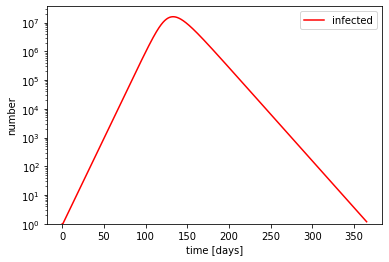

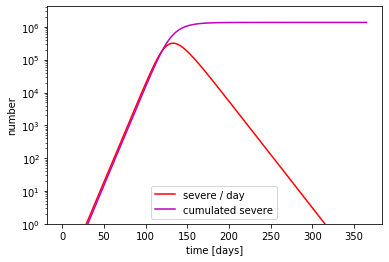

In [72]:
n_days = 365.0*1.0
n_steps_per_day = 10 # stability of the solution

b   = 0.25 / 1.0
g   = 0.11 
print("R_0 = %3.2f" % (b/g))
N   = 8.0e7
NI0 = 1.0

seir = SIR(n_steps_per_day, n_days)
seir.set_parameter(N, NI0, b, g, lag)
seir.run()
seir.plot(percent_severe = 2.0e-2, percent_fatal = 1.0e-3)


# Modified SEIR Model

* S - susceptible
* E - exposed
* I - infected
* R - recovered

$S(t+1) = S(t) - \beta  E(t) \dfrac{S(t)}{N}$

$E(t+1) = E(t) + \beta  E(t) \dfrac{S(t)}{N} - \alpha E(t-t_{lag})$ 

$I(t+1) = I(t) + \alpha E(t-t_{lag}) - \gamma I(t)$ 

$R(t+1) = R(t) + \gamma I(t)$

* $\alpha$ = 1/7 = 0.142 
  - exposed to infected conversion rate per day, mean incubation time
* $\beta$ = 0.25
  - probability of infection per day = 5% infection probability per contact * 5 contacts per day of infected with susceptible
* $\gamma$ = 1/9.1 = 0.11
  - treatment cycle 9.1 days
* lag = 7 days

$R_0 = \dfrac{\beta}{\gamma}$

```
https://doi.org/10.1101/2020.03.03.20030858
Prediction of New Coronavirus Infection Based on a Modified SEIR Model
Zhou Tang, Xianbin Li, Houqiang Li
```

In [73]:
class SEIR:
    def __init__(self, nb_steps_per_day, nb_days):
        self.nb_days, self.nb_steps_per_day = nb_days, nb_steps_per_day
        nb_steps = int(nb_days * nb_steps_per_day)
        self.S = np.zeros(nb_steps)
        self.E = np.zeros(nb_steps)
        self.I = np.zeros(nb_steps)
        self.R = np.zeros(nb_steps)
        
        self.dt = 1.0/float(n_steps_per_day)
        self.nb_steps = nb_steps
    
    def set_parameter(self, N, NE0, a, b, g, lag):
        self.S = self.S + N
        self.E = self.E + NE0
        self.N, self.a, self.b, self.g, self.lag = N, a, b, g, lag

    def step(self, i):
        dd = self.b * self.E[i] * self.S[i] / self.N
        dS = - dd
        dE =   dd - self.a * self.E[i-lag]
        dI =        self.a * self.E[i-lag] - self.g * self.I[i]
        dR =                                 self.g * self.I[i]
        
        self.S[i+1] = self.S[i] + dS * self.dt
        self.E[i+1] = self.E[i] + dE * self.dt
        self.I[i+1] = self.I[i] + dI * self.dt
        self.R[i+1] = self.R[i] + dR * self.dt

    def run(self):
        for i in range(self.lag, (self.nb_steps)-1):
            self.step(i)

    def plot(self, percent_severe = 5.0e-2, percent_fatal = 5.0e-3):
        c = 1.0e-6
        t = np.mgrid[0.0:float(self.nb_days):self.nb_steps*1j]
        plt.plot(t, self.S*c, 'g', label="susceptible")
        plt.plot(t, self.E*c, 'b', label="exposed")
        plt.plot(t, self.I*c, 'r', label="infected")
        plt.plot(t, self.R*c, 'm', label="recovered")
        plt.xlabel("time [days]")
        plt.ylabel("number [million]")
        plt.legend(loc = 'best')

        c = 1.0
        plt.figure()
        plt.semilogy(t, self.E*c, 'b', label="exposed")
        plt.semilogy(t, self.I*c, 'r', label="infected")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.figure()
        plt.semilogy(t, self.I*c * percent_severe, 'r', label="severe / day")
        plt.semilogy(t, self.R*c * percent_severe, 'm', label="cumulated severe")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.figure()
        plt.semilogy(t, self.I*c * percent_fatal, 'k', label="dead / day")
        plt.semilogy(t, self.R*c * percent_fatal, 'c', label="cumulated dead")
        plt.xlabel("time [days]")
        plt.ylabel("number")
        plt.legend(loc = 'best')
        plt.axis([None, None, 1.0, None])

        plt.show()

R_0 = 2.27


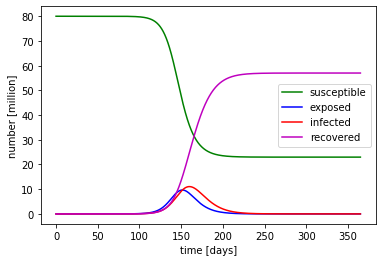

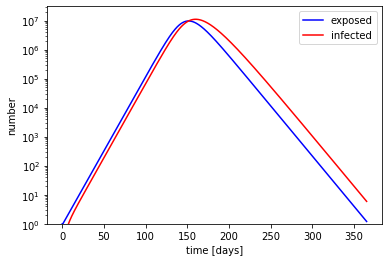

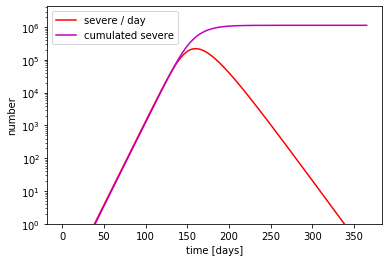

In [74]:
n_days = 365.0*1.0
n_steps_per_day = 10 # stability of the solution

a   = 0.143
b   = 0.25
g   = 0.11 
print("R_0 = %3.2f" % (b/g))
lag = 7
N   = 8.0e7
NE0 = 1.0

seir = SEIR(n_steps_per_day, n_days)
seir.set_parameter(N, NE0, a, b, g, lag)
seir.run()
seir.plot(percent_severe = 2.0e-2, percent_fatal = 1.0e-3)